# tf.nn.conv2d

https://www.tensorflow.org/api_docs/python/tf/nn/conv2d

https://www.tensorflow.org/api_guides/python/nn#Convolution

这个函数对输入的4D`input`使用4D`filter`做2D卷积计算，步长由`strides`指定，填充方式由`padding`指定。输出一个4D的tensor表示结果。

* input: [batch, in_height, in_width, in_channels] 这个好理解，例如一个batch的图片。

* filter: [filter_height, filter_width, in_channels, out_channels] filter就是kernel。这里指定了kernel的高和宽，in_channels也就是必须和input的in_channels一样，也就是卷积核的深度。out_channels是卷积核的个数。

* strides: [1, stride, stride, 1] 也是4D的，格式由`data format`决定，默认也是NHWC。但是N和C必须等于1。中间两个就是高和宽的步长。

* padding: `SAME` 或者 `VALID`

* data format: NHWC or NCHW。默认是NHWC（Num_samples x Height x Width x Channels）

做卷积运算，卷积核的深度必须和输入的深度一致。从高和宽两个维度上，用卷积核覆盖输入，然后做卷积运算（包含所有的深度，最后求和）产生一个输出值。然后以stride为步长滑动再重复做卷积操作。

## 填充

padding填充一些值（比如0）在输入的空间边界（高和宽）外，从而在做卷积操作的时候，卷积核与输入的空间能够匹配。

常见的SAME操作，会在边界上填充，以保持输入和输出的空间大小不变。

TODO

## 数字实例

下面这个图来源于：http://cs231n.github.io/convolutional-networks/

![卷积操作实例](conv2d_example.png)

这是一个计算卷积操作的实例，下面用代码计算这个过程。输入是5x5，步长2，padding1。

注意：计算出来的结果和图片稍微不同，因为tf.nn.conv2d没有bias参数。因为`b0[:,:,0]==1`，所以`o[:,:,0]`的每个元素都比图中的数字小1。

In [10]:
import tensorflow as tf
import numpy as np

tf.InteractiveSession()

x0 = [
    [2, 1, 2, 0, 0],
    [0, 2, 0, 2, 1],
    [1, 1, 2, 1, 2],
    [0, 1, 0, 0, 2],
    [1, 0, 1, 2, 2],
]
x1 = [
    [0, 0, 2, 2, 1],
    [0, 2, 1, 2, 2],
    [1, 1, 1, 1, 2],
    [2, 0, 2, 0, 0],
    [0, 0, 0, 0, 2],
]
x2 = [
    [1, 2, 2, 2, 0],
    [1, 1, 1, 1, 1],
    [2, 2, 1, 2, 1],
    [1, 0, 2, 0, 1],
    [1, 1, 1, 2, 0],
]
x = np.zeros((1, 5, 5, 3), dtype=np.float32)
x[:, :, :, 0] = x0
x[:, :, :, 1] = x1
x[:, :, :, 2] = x2

w00 = [
    [0,  -1, 0],
    [-1, -1, -1],
    [1,  -1, 0],
]
w01 = [
    [1, -1, 0],
    [0,  0, 0],
    [0,  0, 0],
]
w02 = [
    [1, -1,  0],
    [-1, 1, -1],
    [1,  0, 0],
]
W0 = np.zeros((3, 3, 3))
W0[:, :, 0] = w00
W0[:, :, 1] = w01
W0[:, :, 2] = w02

w10 = [
    [1,  1, -1],
    [1,  1,  0],
    [-1, 1,  1],
]
w11 = [
    [-1,  0, -1],
    [-1, -1,  1],
    [0,  -1,  1],
]
w12 = [
    [-1, 0, 0],
    [1,  0, 1],
    [1,  0, 1],
]
W1 = np.zeros((3, 3, 3))
W1[:, :, 0] = w10
W1[:, :, 1] = w11
W1[:, :, 2] = w12

W = np.zeros((3, 3, 3, 2), dtype=np.float32)
W[:, :, :, 0] = W0
W[:, :, :, 1] = W1

output = tf.nn.conv2d(x, W, strides=[1, 2, 2, 1], padding='SAME').eval()
print output.shape
print 'o[:,:,0]'
print output[0, :, :, 0]
print
print 'o[:,:,1]'
print output[0, :, :, 1]


(1, 3, 3, 2)
o[:,:,0]
[[-4. -2.  0.]
 [-3. -5. -7.]
 [-4. -9. -9.]]

o[:,:,1]
[[  9.  10.  -3.]
 [ -2.  -2.   4.]
 [  1.   5.   6.]]


## 图片实例

图片和kernel都来自于wiki：https://en.wikipedia.org/wiki/Kernel_(image_processing)


![原图](Vd-Orig.png)

\begin{bmatrix}
-1 &  -1 & -1 \\
-1 & \ \ 8 & -1 \\
-1 &  -1 & -1
\end{bmatrix}


(100, 100, 3)


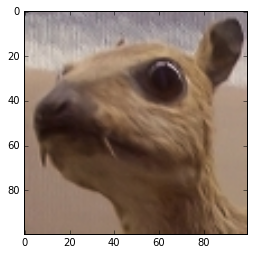

In [43]:
from scipy import misc
from matplotlib import pyplot as plt
%matplotlib inline

im = misc.imread('Vd-Orig.png')
print im.shape
plt.imshow(im)

(1, 100, 100, 3)
(1, 100, 100, 1)


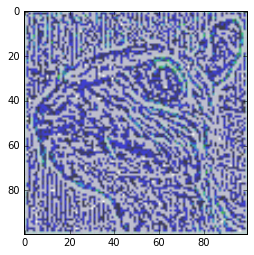

In [46]:
input = tf.cast(im.reshape(1, 100, 100, 3), tf.float32)
print input.shape

kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
])
filter = np.zeros((3, 3, 3, 1), dtype=np.float32)
# 三个通道都用一样的kernel
filter[:, :, 0, 0] = filter[:, :, 1, 0] = filter[:, :, 2, 0] = kernel

output = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME').eval()
print output.shape

edge = output.reshape(100, 100, 1)
edge.dtype = np.uint8
plt.imshow(edge)